<a href="https://colab.research.google.com/github/CristianRiquelmeF/Ciencia-de-datos/blob/main/Trabajo1/An%C3%A1lisis_exploratorio_y_visualizaci%C3%B3n_gr%C3%A1fica_Cristian_Riquelme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Carga de librerías y base de datos**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/BBDD/M7.EV.DS - Dataset.xlsx')

+ **Presentación y objetivos del análisis**

A continuación, se presentan los resultados de un análisis de datos efectuado sobre la información comercial de una tienda de retail durante el periodo de un año. A través del análisis, realizado con Python, será posible tratar los datos para convertirlos en información optimizada para mejorar las operaciones según grandes interrogantes que surgen desde las dinámicas propias del mercado y las características de los compradores.

El reporte busca dar respuesta a las siguientes cuestionantes que, siendo revisadas y consideradas, darían una mejor operacionalidad a la empresa retail tratada.
1. ¿Existen productos favoritos que compran los clientes?
2. ¿Existe algún horario específico en el que los clientes compran?
3. ¿En qué horario sugeriría refuerzo en los servidores de la tienda para evitar un colapso?
4. ¿Qué frecuencia de compra tiene un cliente de alta frecuencia?
5. ¿ Cuánto debería gastar un cliente para considerarlo sobre la media?
6. ¿Cómo se distribuyen las antigüedades de los clientes?
7. Si se clasifican en 3 grupos a los clientes, en base a su frecuencia de compra ¿Qué diferencias existen entre cada clúster? (Utilice el algoritmo de clusterización Kmeans).




+ **Análisis exploratorio**

In [ ]:
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
data.shape

(541909, 8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
data.nunique().sort_values()

Country           38
Quantity         722
UnitPrice       1630
StockCode       4070
Description     4223
CustomerID      4372
InvoiceDate    23260
InvoiceNo      25900
dtype: int64

In [ ]:
#Revisión de valores nulos.
print(data.isnull().sum().sort_values(ascending = False))
na_por = ((data.isnull().sum() / len(data))*100).sort_values(ascending = False)
print('##################################')
print('Valores porcentuales de nulos')
print(na_por)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64
##################################
Valores porcentuales de nulos
CustomerID     24.926694
Description     0.268311
InvoiceNo       0.000000
StockCode       0.000000
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
Country         0.000000
dtype: float64


In [ ]:
#cambiando los caracteres de la variable 'Description'
data["Description"] = data.Description.str.lower()

In [ ]:
#Agregando mayúsculas
data["Description"] = data.Description.str.capitalize()

In [ ]:
#Agregando columna con gasto total por cliente
data["Gasto_total"] = data['Quantity'] * data['UnitPrice']
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Gasto_total
0,536365,85123A,White hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,White metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,Cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,Knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,Red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
#transfomando la información de las fechas
data['InvoiceDate'] = pd.to_datetime(data.InvoiceDate, format="%m/%d/%Y %H:%M" )
data['date'] = data['InvoiceDate'].dt.date
data["DiaSemana"] = data.InvoiceDate.dt.dayofweek+1
data['Día_semana'] = data['InvoiceDate'].dt.day_name()
data["Month"] = data.InvoiceDate.dt.month
data['Mes'] = data['InvoiceDate'].dt.month_name()
data['Hora'] = data.InvoiceDate.dt.hour
data.insert(loc=10, column='year_month', value=data['InvoiceDate'].map(lambda x: 100*x.year + x.month))

data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Gasto_total,date,year_month,DiaSemana,Día_semana,Month,Mes,Hora
0,536365,85123A,White hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,201012,3,Wednesday,12,December,8
1,536365,71053,White metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,201012,3,Wednesday,12,December,8
2,536365,84406B,Cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,201012,3,Wednesday,12,December,8
3,536365,84029G,Knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,201012,3,Wednesday,12,December,8
4,536365,84029E,Red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,201012,3,Wednesday,12,December,8


In [ ]:
#Revisión de artículos cancelados
datCan = data[data['InvoiceNo'].str.startswith("C", na=False)].sort_values("Quantity", ascending = True)
datCan.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Gasto_total,date,year_month,DiaSemana,Día_semana,Month,Mes,Hora
540422,C581484,23843,"Paper craft , little birdie",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,-168469.6,2011-12-09,201112,5,Friday,12,December,9
61624,C541433,23166,Medium ceramic top storage jar,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,-77183.6,2011-01-18,201101,2,Tuesday,1,January,10
4287,C536757,84347,Rotating silver angels t-light hldr,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom,-280.8,2010-12-02,201012,4,Thursday,12,December,14
160145,C550456,21108,Fairy cake flannel assorted colour,-3114,2011-04-18 13:08:00,2.10,15749.0,United Kingdom,-6539.4,2011-04-18,201104,1,Monday,4,April,13
160144,C550456,21175,Gin + tonic diet metal sign,-2000,2011-04-18 13:08:00,1.85,15749.0,United Kingdom,-3700.0,2011-04-18,201104,1,Monday,4,April,13


In [ ]:
#Conteo de filas con valores cancelados
datCan.shape

(9288, 16)

In [ ]:
df2 = data

In [ ]:
df2.describe()

,Quantity,UnitPrice,CustomerID,Gasto_total,year_month,DiaSemana,Month,Hora
count,541909.000000,541909.000000,406829.000000,541909.000000,541909.000000,541909.000000,541909.000000,541909.000000
mean,9.552250,4.611114,15287.690570,17.987795,201099.713989,3.431277,7.553128,13.078729
std,218.081158,96.759853,1713.600303,378.810824,25.788703,1.844709,3.509055,2.443270
min,-80995.000000,-11062.060000,12346.000000,-168469.600000,201012.000000,1.000000,1.000000,6.000000
25%,1.000000,1.250000,13953.000000,3.400000,201103.000000,2.000000,5.000000,11.000000
50%,3.000000,2.080000,15152.000000,9.750000,201107.000000,3.000000,8.000000,13.000000
75%,10.000000,4.130000,16791.000000,17.400000,201110.000000,5.000000,11.000000,15.000000
max,80995.000000,38970.000000,18287.000000,168469.600000,201112.000000,7.000000,12.000000,20.000000


+ Boxplot de las variables cuantitativas y sus outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribución de cantidades')

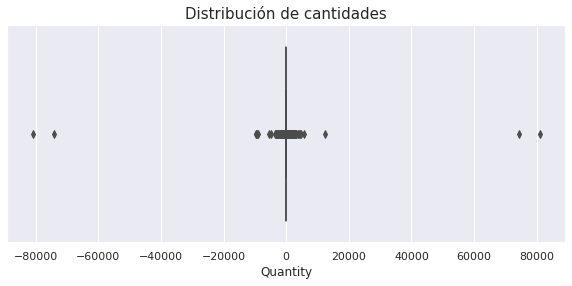

In [ ]:
#Revisión outliers en variable 'Quantity'
fig=plt.figure(figsize=(10,4))
ax=sns.boxplot(df2['Quantity'])
ax.set_title('Distribución de cantidades', fontsize=15)

In [ ]:
df2 = data[data["Quantity"] > 0]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribución de cantidades')

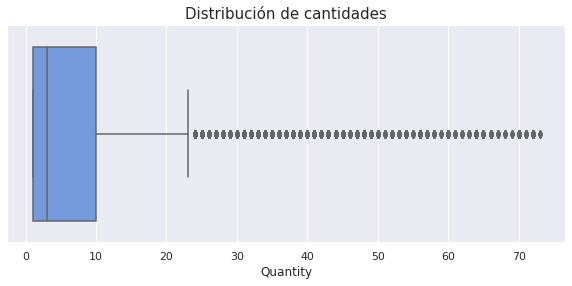

In [ ]:
#Se obtiene el rango intercuartil para observar de mejor manera la distribución de los datos
q1_rev = df2['Quantity'].quantile(0.05)
q3_rev= df2['Quantity'].quantile(0.95)
IQR = q3_rev - q1_rev
can = df2[(df2['Quantity'] >= q1_rev - 1.5*IQR) & (df2['Quantity'] <= q3_rev + 1.5*IQR)]
fig=plt.figure(figsize=(10,4))
ax=sns.boxplot(can['Quantity'], color='cornflowerblue')
ax.set_title('Distribución de cantidades', fontsize=15)

In [ ]:
print(can['Quantity'].describe())
print('Mediana:', can['Quantity'].median())

count    522206.000000
mean          7.247201
std           9.863158
min           1.000000
25%           1.000000
50%           3.000000
75%          10.000000
max          73.000000
Name: Quantity, dtype: float64
Mediana: 3.0


In [ ]:
print(df2['Quantity'].median())

3.0


Al presentar la distribución en el primer gráfico de caja de la variable ‘Cantidad’, se observan altos valores atípicos e incluso valores negativos. Los valores negativos serían parte de los productos cancelados, y los de más alto valor de los clientes que compran al por mayor ciertos productos.
Para una mejor visualización e imputación de datos atípicos se procedió a eliminar los valores menores a 0 de la base de datos, para dejar sólo los productos efectivamente vendidos.
El segundo gráfico muestra el resultado de tal imputación, además, se calculó el rango intercuartil dejando fuera el 5% más bajo y el 5% más alto para que la visualización permitiera señalar la distribución del 50% central de los casos.
Se obtiene que: el 50% central de cantidades fue de 1 a 10 unidades, su media es de 7 y la mediana de 3. Sobre el límite superior se observan los valores atípicos.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Precios unitarios')

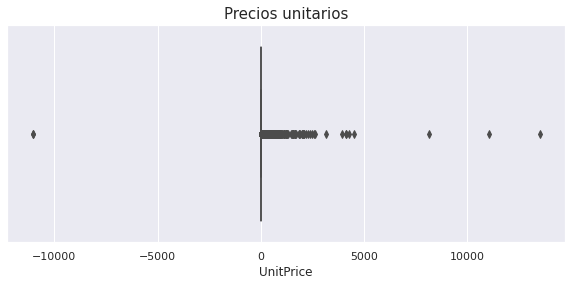

In [ ]:
#Revisión outliers en variable 'UnitPrice'
fig=plt.figure(figsize=(10,4))
ax=sns.boxplot(df2['UnitPrice'])
ax.set_title('Precios unitarios', fontsize=15)

In [ ]:
df2 = df2[df2["UnitPrice"] > 0]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Precios unitarios')

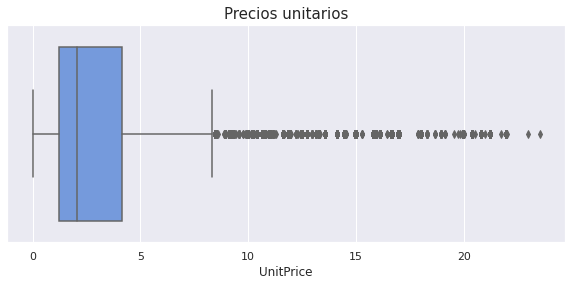

In [ ]:
#Se obtiene el rango intercuartil para observar de mejor manera la distribución de los datos
q1_rev = df2['UnitPrice'].quantile(0.05)
q3_rev= df2['UnitPrice'].quantile(0.95)
IQR = q3_rev - q1_rev
pre = df2[(df2['UnitPrice'] >= q1_rev - 1.5*IQR) & (df2['UnitPrice'] <= q3_rev + 1.5*IQR)]
fig=plt.figure(figsize=(10,4))
ax=sns.boxplot(pre['UnitPrice'], color='cornflowerblue')
ax.set_title('Precios unitarios', fontsize=15)

In [ ]:
#Agrupados por identificación del cliente
top10c = pd.DataFrame(df2.groupby("Description").agg({"CustomerID":"count"}).sort_values("CustomerID", ascending = False).head(10).reset_index())
top10c

,Description,CustomerID
0,White hanging heart t-light holder,2028
1,Regency cakestand 3 tier,1723
2,Jumbo bag red retrospot,1618
3,Assorted colour bird ornament,1408
4,Party bunting,1396
5,Lunch bag red retrospot,1316
6,Set of 3 cake tins pantry design,1159
7,Lunch bag black skull.,1105
8,Postage,1099
9,Pack of 72 retrospot cake cases,1068


In [ ]:
print(pre['UnitPrice'].describe())
print('Mediana:', pre['UnitPrice'].median())

count    526992.000000
mean          3.158892
std           3.103563
min           0.001000
25%           1.250000
50%           2.080000
75%           4.130000
max          23.530000
Name: UnitPrice, dtype: float64
Mediana: 2.08


Al presentar la distribución en el primer gráfico de caja de la variable ‘Precio unitario’, se observan altos valores atípicos e incluso un valor negativo. Los valores negativos serían parte de los productos cancelados, y los de más alto valor de los clientes que compran al por mayor ciertos productos.
Para una mejor visualización e imputación de datos atípicos se procedió a eliminar los valores menores a 0 de la base de datos, para dejar sólo los productos efectivamente vendidos.
El segundo gráfico muestra el resultado de tal imputación, además, se calculó el rango intercuartil dejando fuera el 5% más bajo y el 5% más alto para que la visualización permitiera señalar la distribución del 50% central de los casos.
Se obtiene que: el 50% central de los precios unitarios  fue de 1.25 a 4.13 euros, su media es de 3.15 y la mediana de 2.08. Sobre el límite superior se observan los valores atípicos.
*Ya no se observan productos cancelados en la base de datos.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


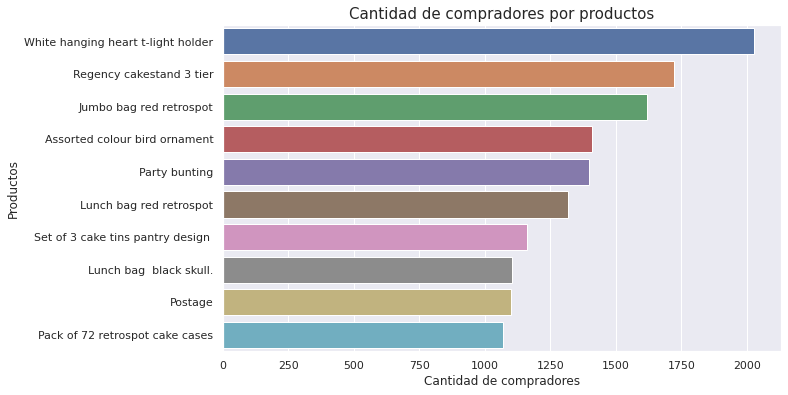

In [ ]:
#Gráfico de barra vertical de los productos registrados

plt.figure(figsize=(10,6))
sns.set_theme(style="darkgrid")
x = top10c['CustomerID']
y= top10c['Description']
sns.barplot (x , y)
plt.ylabel('Productos')
plt.xlabel('Cantidad de compradores')
plt.title('Cantidad de compradores por productos', fontsize=15)
plt.show()

In [ ]:
#Agrupados por gasto total más alto
top10 = pd.DataFrame(df2.groupby("Description").agg({"Gasto_total":"sum"}).sort_values("Gasto_total", ascending = False).head(10).reset_index())
top10

,Description,Gasto_total
0,Dotcom postage,206248.77
1,Regency cakestand 3 tier,174484.74
2,"Paper craft , little birdie",168469.60
3,White hanging heart t-light holder,106292.77
4,Party bunting,99504.33
5,Jumbo bag red retrospot,94340.05
6,Medium ceramic top storage jar,81700.92
7,Manual,78112.82
8,Postage,78101.88
9,Rabbit night light,66964.99


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


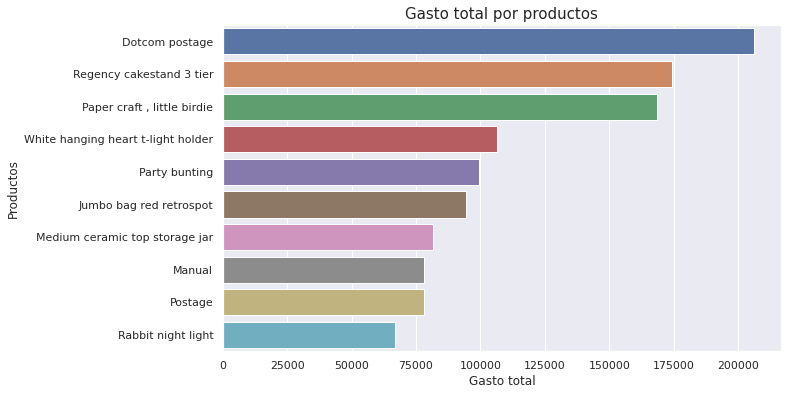

In [ ]:
#Gráfico de barra vertical de los productos registrados

plt.figure(figsize=(10,6))
sns.set_theme(style="darkgrid")
x = top10['Gasto_total']
y= top10['Description']
sns.barplot (x , y)
plt.ylabel('Productos')
plt.xlabel('Gasto total')
plt.title('Gasto total por productos', fontsize=15)
plt.show()

Al agrupar los datos por cantidad de compradores que tiene cada producto se observa que: ‘White hanging heart t-light holder’ es el favorito, con un total de 2028, le sigue ‘Regency cakestand 3 tier’ con 1723 y ‘Jumbo bag red retrospot’ con 1618 compradores.

Al agrupar los datos por gasto total de los compradores se observa que: ‘Dotcom postage’ significa un ingreso de  206248.77, le sigue ‘Regency cakestand 3 tier’  con  174484.74 y ‘Paper craft , little birdie’ $168469.60.


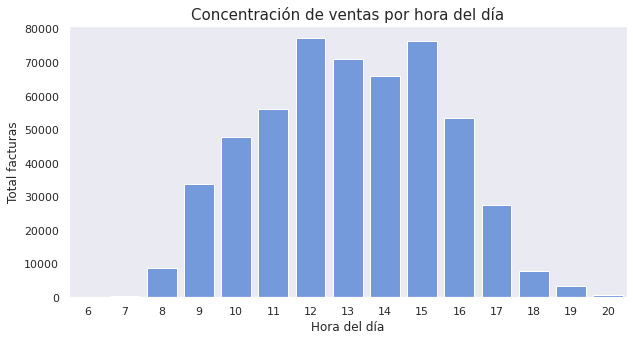

In [ ]:
#Gráfico de ventas por hora del día
plt.figure(figsize=(10,5))
sns.set_theme(style="dark")
sns.countplot(x="Hora", data=df2 , color='cornflowerblue')
plt.xlabel('Hora del día')
plt.ylabel('Total facturas')
plt.title('Concentración de ventas por hora del día',fontsize=15)
plt.show()

<Figure size 432x288 with 0 Axes>

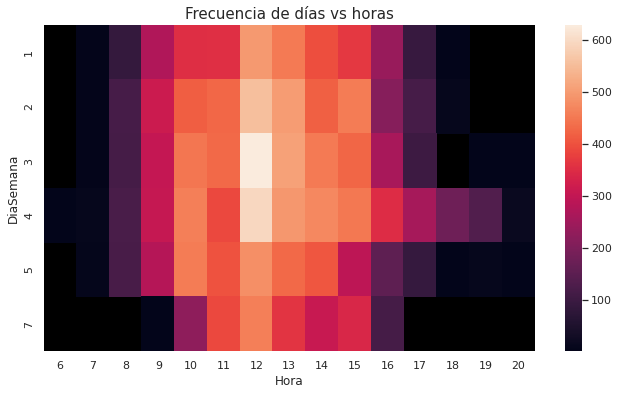

In [ ]:
#heatmap frecuencia por días y horas
fig = plt.figure()
fig=plt.figure(figsize=(11,6))
ax = fig.add_subplot(111)
data_new  = df2.groupby(["DiaSemana", "Hora"])["InvoiceNo"].unique().reset_index()
data_new["InvoiceNo"] = data_new["InvoiceNo"].apply(len)
data_new = data_new.pivot('DiaSemana', 'Hora', 'InvoiceNo')
sns.heatmap(data_new)
plt.title("Frecuencia de días vs horas", fontsize=15)
ax.set_facecolor('black')
plt.show()

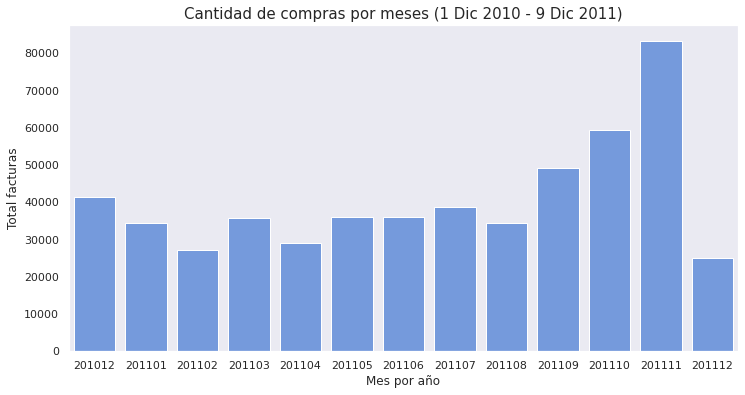

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x="year_month", data=df2 , color='cornflowerblue')
plt.xlabel('Mes por año')
plt.ylabel('Total facturas')
plt.title('Cantidad de compras por meses (1 Dic 2010 - 9 Dic 2011)',fontsize=15)
plt.show()

Se observa que:

1.   El horario de venta es entre las 8 AM y 20 PM.  
2.   Entre las 12 y 15 PM es el rango horario específico en el cual se realizan la mayor cantidad de ventas. Es en este momento del día en el que se aconsejaría reforzar el sistema de servidores para evitar colapsos indeseados.
3. Al observar el mapa de calor entre los días de la semana y las horas se observa que; el día miércoles a las 12PM se registran más ventas, martes y jueves poseen igualmente una importante actividad.
4. Dentro del año de actividad analizado, el mes de noviembre del 2011 registró una mayor cantidad de ventas seguido por el mes anterior.





+ **Gráficas por países**

In [ ]:
clientes_paises = pd.DataFrame(df2.groupby("Country").agg({"Gasto_total":"sum"}).sort_values("Gasto_total", ascending = False).head(10).reset_index())
clientes_paises

,Country,Gasto_total
0,United Kingdom,9025222.084
1,Netherlands,285446.340
2,EIRE,283453.960
3,Germany,228867.140
4,France,209715.110
5,Australia,138521.310
6,Spain,61577.110
7,Switzerland,57089.900
8,Belgium,41196.340
9,Sweden,38378.330


In [ ]:
no_uk = clientes_paises[clientes_paises.Country != 'United Kingdom']
no_uk.head(10)

,Country,Gasto_total
1,Netherlands,285446.34
2,EIRE,283453.96
3,Germany,228867.14
4,France,209715.11
5,Australia,138521.31
6,Spain,61577.11
7,Switzerland,57089.90
8,Belgium,41196.34
9,Sweden,38378.33


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


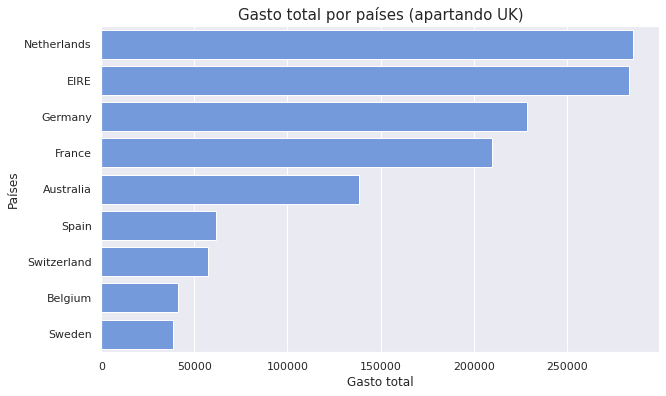

In [ ]:
plt.figure(figsize=(10,6))
sns.set_theme(style="darkgrid")
x = no_uk['Gasto_total']
y= no_uk['Country']
sns.barplot (x , y , color='cornflowerblue')
plt.ylabel('Países')
plt.xlabel('Gasto total')
plt.title('Gasto total por países (apartando UK)',fontsize=15)
plt.show()

In [ ]:
#Cantidad de facturas emitidas por país
ordenes_paises = pd.DataFrame(df2.groupby("Country").agg({"InvoiceNo":"count"}).sort_values("InvoiceNo", ascending = False).head(10).reset_index())
ordenes_paises

,Country,InvoiceNo
0,United Kingdom,485123
1,Germany,9040
2,France,8407
3,EIRE,7890
4,Spain,2484
5,Netherlands,2359
6,Belgium,2031
7,Switzerland,1966
8,Portugal,1501
9,Australia,1182


In [ ]:
no_ukcan = ordenes_paises[ordenes_paises.Country != 'United Kingdom']
no_ukcan.head(10)

,Country,InvoiceNo
1,Germany,9040
2,France,8407
3,EIRE,7890
4,Spain,2484
5,Netherlands,2359
6,Belgium,2031
7,Switzerland,1966
8,Portugal,1501
9,Australia,1182


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Unrecognized location 'up right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


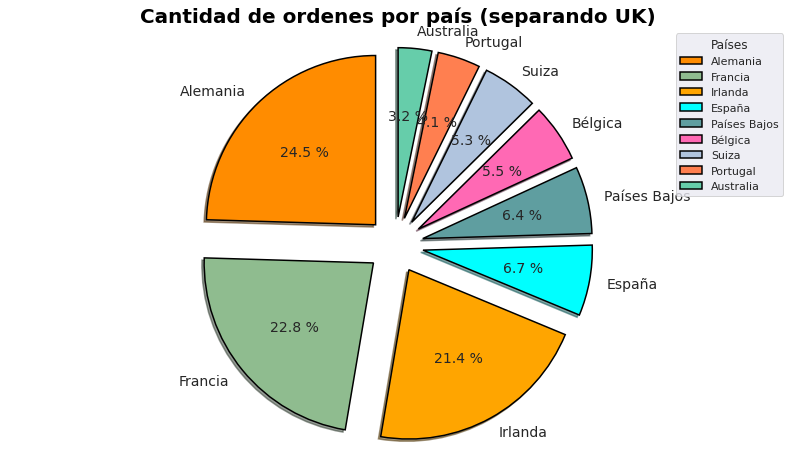

In [ ]:
#Gráfico cantidad de facturas por países sin contar a UK por ser el mayoritario
fig = plt.figure(figsize =(14, 8))
x = no_ukcan['InvoiceNo']
nombres = ["Alemania","Francia","Irlanda","España", 'Países Bajos','Bélgica','Suiza','Portugal', 'Australia']
colores = ["darkorange", "darkseagreen", "orange", "cyan", "cadetblue", "hotpink", "lightsteelblue", "coral",  "mediumaquamarine"]
explodes = [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,]
plt.pie(x, labels=nombres, autopct="%0.1f %%", colors=colores, textprops={'fontsize': 14},
                                                 startangle= 90,
                                                 radius =1.5,
                                                 rotatelabels=False,
                                                 wedgeprops = {'linewidth': 1.5, 'edgecolor': 'black'},
                                                 shadow = True,
                                                 explode = explodes)
plt.legend(title ="Países",loc='up right')
plt.axis("equal")
plt.title("Cantidad de ordenes por país (separando UK)", color='black', fontweight="bold", fontsize="20")
plt.show()

In [ ]:
#Cantidad de productos por país
cantidad_paises = pd.DataFrame(df2.groupby("Country").agg({"Quantity":"sum"}).sort_values("Quantity", ascending = False).head(10).reset_index())
cantidad_paises

,Country,Quantity
0,United Kingdom,4662390
1,Netherlands,200361
2,EIRE,147173
3,Germany,119261
4,France,112103
5,Australia,83901
6,Sweden,36083
7,Switzerland,30629
8,Spain,27940
9,Japan,26016


In [ ]:
no_ukcant = cantidad_paises[cantidad_paises.Country != 'United Kingdom']
no_ukcant.head(10)

,Country,Quantity
1,Netherlands,200361
2,EIRE,147173
3,Germany,119261
4,France,112103
5,Australia,83901
6,Sweden,36083
7,Switzerland,30629
8,Spain,27940
9,Japan,26016


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Unrecognized location 'up right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


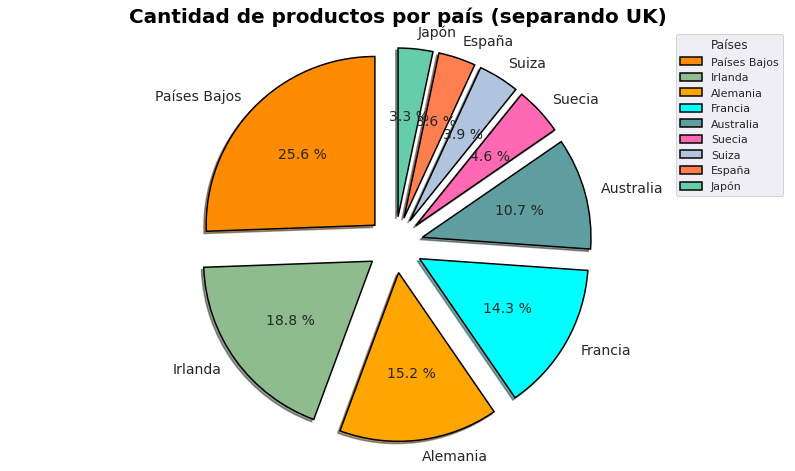

In [ ]:
#Gráfico cantidad de productos por países sin contar a UK por ser el mayoritario
fig = plt.figure(figsize =(14, 8))
x = no_ukcant['Quantity']
nombres = ["Países Bajos","Irlanda","Alemania","Francia", 'Australia','Suecia','Suiza','España', 'Japón']
colores = ["darkorange", "darkseagreen", "orange", "cyan", "cadetblue", "hotpink", "lightsteelblue", "coral",  "mediumaquamarine"]
explodes = [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,]
plt.pie(x, labels=nombres, autopct="%0.1f %%", colors=colores, textprops={'fontsize': 14},
                                                 startangle= 90,
                                                 radius =1.5,
                                                 rotatelabels=False,
                                                 wedgeprops = {'linewidth': 1.5, 'edgecolor': 'black'},
                                                 shadow = True,
                                               explode = explodes)
plt.legend(title ="Países",loc='up right')
plt.axis("equal")
plt.title("Cantidad de productos por país (separando UK)", color='black', fontweight="bold", fontsize="20")
plt.show()

+ **Agrupación por antigüedad, frecuencia, gasto total y recencia de los clientes**

In [ ]:
df2.isnull().sum().sort_values(ascending=False)

CustomerID     132220
InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
Gasto_total         0
date                0
year_month          0
DiaSemana           0
Día_semana          0
Month               0
Mes                 0
Hora                0
dtype: int64

In [ ]:
#borrar filas con missing en variable 'Customer ID'
df3 = df2.dropna()

In [ ]:
df3.isnull().sum().sort_values(ascending=False)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Gasto_total    0
date           0
year_month     0
DiaSemana      0
Día_semana     0
Month          0
Mes            0
Hora           0
dtype: int64

In [ ]:
df3.shape

(397884, 16)

+ Creación columna frecuencia de compra

In [ ]:
#calcular la frecuencia
frecuencia = df3.groupby('CustomerID',as_index=False)['InvoiceNo'].count()
frecuencia.columns = ['CustomerID','Frequency']
frecuencia.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


+ Creación columna gasto total por clientes

In [ ]:
#sumar todo el gasto
gasto=df3.groupby('CustomerID',as_index=False)['Gasto_total'].sum()
gasto.columns = ['CustomerID','Monetary']
gasto.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


+ Creación columna recencia de clientes

In [ ]:
#Agrupar los consumidores según su última compra
recencia = df3.groupby(by='CustomerID', as_index=False)['date'].max()
recencia.columns = ['CustomerID','ultima_compra']
recencia.head()

,CustomerID,ultima_compra
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02


In [ ]:
#crear la última fecha
now = dt.date(2011,12,9)
print(now)

2011-12-09


In [ ]:
#calcular Recency
recencia['Recency'] = recencia['ultima_compra'].apply(lambda x: (now - x).days)

In [ ]:
recencia.drop(columns=['ultima_compra'],inplace=True)
recencia.head()

,CustomerID,Recency
0,12346.0,325
1,12347.0,2
2,12348.0,75
3,12349.0,18
4,12350.0,310


+ Creación columna antigüedad de clientes

In [ ]:
antiguedad = df3.groupby(by='CustomerID', as_index=False)['date'].min()
antiguedad.columns = ['CustomerID','primeracompra']
antiguedad.head()

,CustomerID,primeracompra
0,12346.0,2011-01-18
1,12347.0,2010-12-07
2,12348.0,2010-12-16
3,12349.0,2011-11-21
4,12350.0,2011-02-02


In [ ]:
antiguedad['antiguedad'] = antiguedad['primeracompra'].apply(lambda x: (now - x).days)
antiguedad.drop(columns=['primeracompra'],inplace=True)
antiguedad.head()

,CustomerID,antiguedad
0,12346.0,325
1,12347.0,367
2,12348.0,358
3,12349.0,18
4,12350.0,310


+ Creación columna de cantidades totales compradas por clientes

In [ ]:
#sumar todas las cantidades
cantidad=df3.groupby('CustomerID',as_index=False)['Quantity'].sum()
cantidad.columns = ['CustomerID','Cantidades']
cantidad.head()

,CustomerID,Cantidades
0,12346.0,74215
1,12347.0,2458
2,12348.0,2341
3,12349.0,631
4,12350.0,197


In [ ]:
#Uniendo las columnas agrupadas
rf = pd.merge(gasto, frecuencia, on='CustomerID', how='inner')
rfm = pd.merge(rf, recencia, on='CustomerID', how='inner')
rfm =pd.merge (rfm, cantidad, on='CustomerID', how='inner')
rfm =pd.merge (rfm, antiguedad, on='CustomerID', how='inner')
rfm.columns = ['CustomerID', 'gasto', 'frecuencia', 'recencia', 'cantidad', 'antiguedad']

rfm.head()

,CustomerID,gasto,frecuencia,recencia,cantidad,antiguedad
0,12346.0,77183.60,1,325,74215,325
1,12347.0,4310.00,182,2,2458,367
2,12348.0,1797.24,31,75,2341,358
3,12349.0,1757.55,73,18,631,18
4,12350.0,334.40,17,310,197,310


In [ ]:
rfm.describe()

,CustomerID,gasto,frecuencia,recencia,cantidad,antiguedad
count,4338.000000,4338.000000,4338.000000,4338.000000,4338.000000,4338.000000
mean,15300.408022,2054.266460,91.720609,92.059474,1191.289073,222.831028
std,1721.808492,8989.230441,228.785094,100.012264,5046.081546,117.854570
min,12346.000000,3.750000,1.000000,0.000000,1.000000,0.000000
25%,13813.250000,307.415000,17.000000,17.000000,160.000000,112.000000
50%,15299.500000,674.485000,41.000000,50.000000,379.000000,248.000000
75%,16778.750000,1661.740000,100.000000,141.750000,992.750000,326.000000
max,18287.000000,280206.020000,7847.000000,373.000000,196915.000000,373.000000


In [ ]:
rfm.shape

(4338, 6)

**Análisis de las variables agrupadas y tratamiento de outliers para mejor visualización y representación**

**FRECUENCIA**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


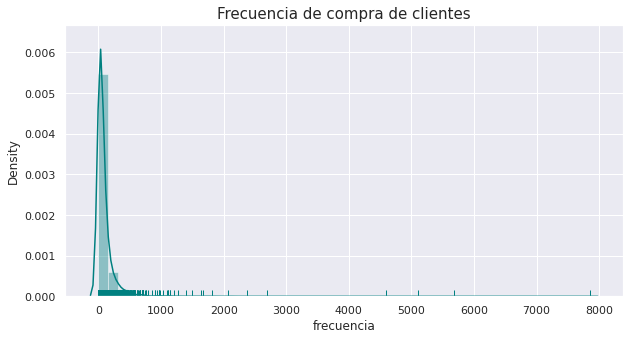

In [ ]:
#Distribución frecuencia
plt.figure(figsize=(10,5))
x = rfm['frecuencia']
plt.title('Frecuencia de compra de clientes', fontsize=15)
ax = sns.distplot(x, color='teal', rug=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribución de frecuencia')

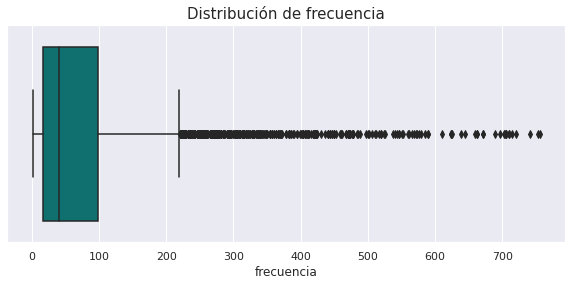

In [ ]:
#Se obtiene el rango intercuartil para observar de mejor manera la distribución de los datos
q1_rev = rfm['frecuencia'].quantile(0.05)
q3_rev= rfm['frecuencia'].quantile(0.95)
IQR = q3_rev - q1_rev
rfm = rfm[(rfm['frecuencia'] >= q1_rev - 1.5*IQR) & (rfm['frecuencia'] <= q3_rev + 1.5*IQR)]
fig=plt.figure(figsize=(10,4))
ax=sns.boxplot(rfm['frecuencia'],color='teal')
ax.set_title('Distribución de frecuencia', fontsize=15)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


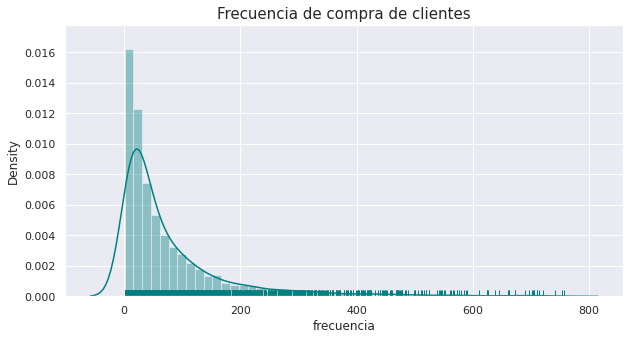

In [ ]:
plt.figure(figsize=(10,5))
x = rfm.query('frecuencia < 1000')['frecuencia']
plt.title('Frecuencia de compra de clientes', fontsize=15)
ax = sns.distplot(x, color='teal', rug=True)

**GASTO**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


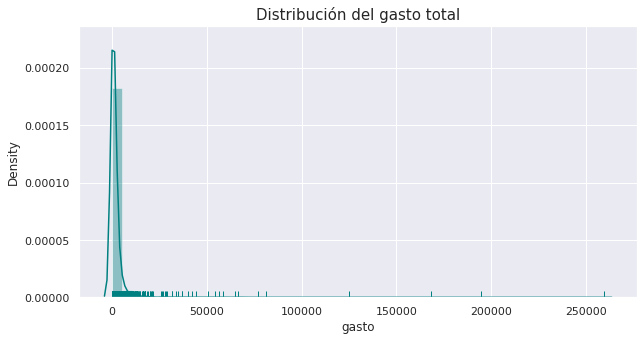

In [ ]:
#Distribución 'gasto'
plt.figure(figsize=(10,5))
x =  rfm['gasto']
plt.title('Distribución del gasto total', fontsize=15)
ax = sns.distplot(x,color='teal', rug=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribución de gasto total')

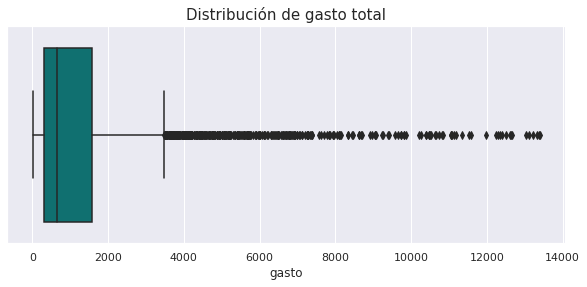

In [ ]:
#Se obtiene el rango intercuartil para observar de mejor manera la distribución de los datos
q1_rev = rfm['gasto'].quantile(0.05)
q3_rev= rfm['gasto'].quantile(0.95)
IQR = q3_rev - q1_rev
rfm = rfm[(rfm['gasto'] >= q1_rev - 1.5*IQR) & (rfm['gasto'] <= q3_rev + 1.5*IQR)]
fig=plt.figure(figsize=(10,4))
ax=sns.boxplot(rfm['gasto'],color='teal')
ax.set_title('Distribución de gasto total', fontsize=15)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


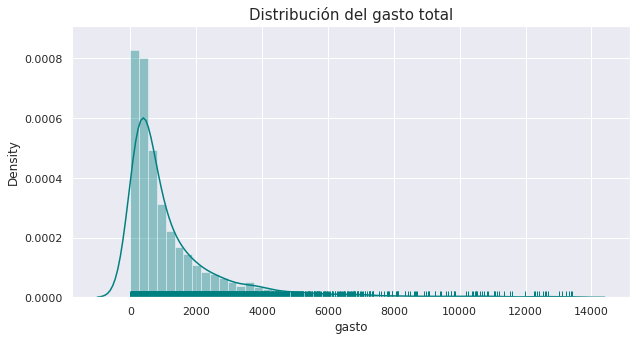

In [ ]:
#Distribución 'gasto'
plt.figure(figsize=(10,5))
x =  rfm['gasto']
plt.title('Distribución del gasto total', fontsize=15)
ax = sns.distplot(x,color='teal', rug=True)

In [ ]:
rfm.describe()

,CustomerID,gasto,frecuencia,recencia,cantidad,antiguedad
count,4255.000000,4255.000000,4255.000000,4255.000000,4255.000000,4255.000000
mean,15304.885546,1312.051294,76.716804,93.527380,778.513514,220.422327
std,1722.335342,1777.786626,99.830773,100.207831,1124.270873,117.514868
min,12347.000000,3.750000,1.000000,0.000000,1.000000,0.000000
25%,13814.500000,304.360000,17.000000,18.000000,157.500000,109.000000
50%,15308.000000,657.230000,40.000000,52.000000,367.000000,246.000000
75%,16786.000000,1569.520000,96.000000,145.000000,930.500000,323.000000
max,18287.000000,13400.240000,756.000000,373.000000,17280.000000,373.000000


De las nuevas variables 'Frecuencia' y 'Gasto total' se calculan sus rangos intercuartiles a modo de tratamiento de outliers, así, sin datos extremos tan altos, se mejorará la visualización. Significó restar 83 casos de un total de 4338 clientes.

**ANTIGÜEDAD**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


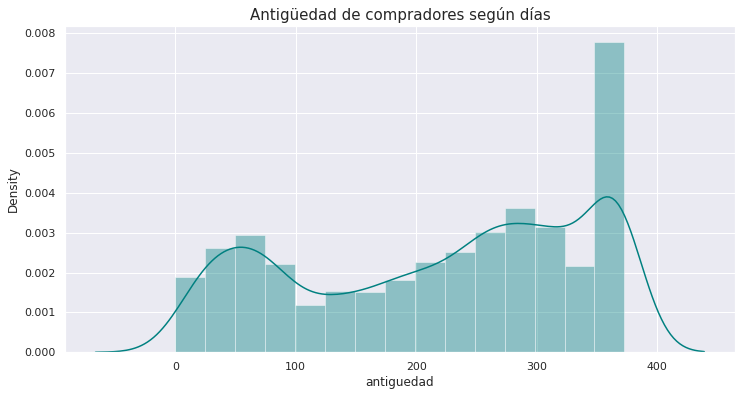

In [ ]:
#Distribución antigüedad
plt.figure(figsize=(12,6))
x = rfm['antiguedad']
plt.title('Antigüedad de compradores según días', fontsize=15)
ax = sns.distplot(x,color='teal')

**RECENCIA**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


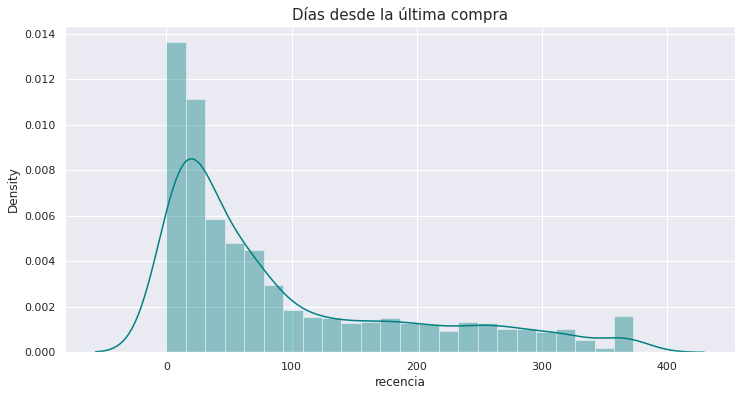

In [ ]:
#Distribución recencia
plt.figure(figsize=(12,6))
x = rfm['recencia']
plt.title('Días desde la última compra', fontsize=15)
ax = sns.distplot(x,color='teal')

Text(0.5, 1.0, 'Correlación entre atributos')

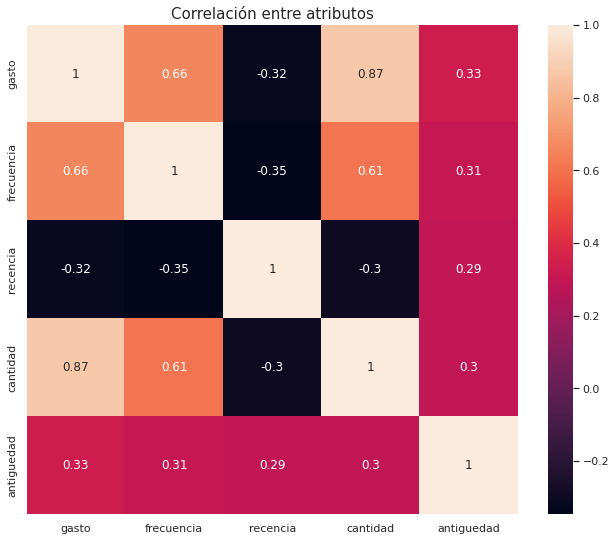

In [ ]:
plt.figure(figsize=(11,9))
sns.heatmap(rfm.iloc[:, 1:6].corr(), annot=True)
plt.title('Correlación entre atributos', fontsize=15)

Se visualiza en el mapa de calor la correlación entre las variables calculadas a partir de la agrupación de los datos según las necesidades del análisis.

La relación entre ‘Recencia’ con ‘Frecuencia’ y ‘Gasto’ es inversamente proporcional.

Existe alta correlación entre ‘Gasto’ y ‘Cantidad’ con un .87 de valor.

También hay una relación importante entre ‘Frecuencia’ y ‘Gasto’ con un  .66.

En la siguiente lámina se graficarán las relaciones más significativas.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


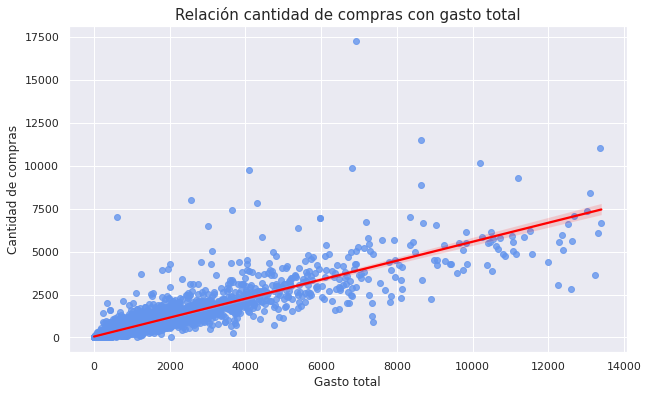

In [ ]:
#Gráfico Relación cantidad de compras con gasto total
plt.figure(figsize=(10,6))
x =rfm['gasto']
y= rfm['cantidad']
sns.regplot(x , y, color='cornflowerblue', line_kws = {'color': 'red'})
plt.ylabel('Cantidad de compras')
plt.xlabel('Gasto total')
plt.title('Relación cantidad de compras con gasto total', fontsize=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


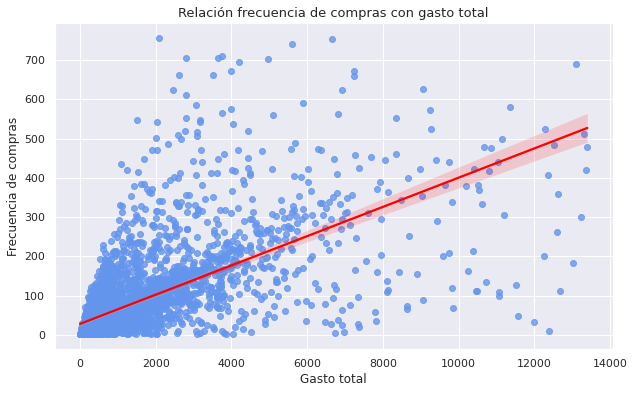

In [ ]:
#Gráfico Relación frecuencia de compras con gasto total
plt.figure(figsize=(10,6))
x =rfm['gasto']
y= rfm['frecuencia']
sns.regplot(x , y, color='cornflowerblue', line_kws = {'color': 'red'})
plt.ylabel('Frecuencia de compras')
plt.xlabel('Gasto total')
plt.title('Relación frecuencia de compras con gasto total', fontsize=13)

plt.show()

In [ ]:
rfm.describe()

,CustomerID,gasto,frecuencia,recencia,cantidad,antiguedad
count,4255.000000,4255.000000,4255.000000,4255.000000,4255.000000,4255.000000
mean,15304.885546,1312.051294,76.716804,93.527380,778.513514,220.422327
std,1722.335342,1777.786626,99.830773,100.207831,1124.270873,117.514868
min,12347.000000,3.750000,1.000000,0.000000,1.000000,0.000000
25%,13814.500000,304.360000,17.000000,18.000000,157.500000,109.000000
50%,15308.000000,657.230000,40.000000,52.000000,367.000000,246.000000
75%,16786.000000,1569.520000,96.000000,145.000000,930.500000,323.000000
max,18287.000000,13400.240000,756.000000,373.000000,17280.000000,373.000000


In [ ]:
rfm.shape

(4255, 6)

**Segmentación de clientes**

In [ ]:
rfm.drop(columns=['cantidad'],inplace=True)
rfm.drop(columns=['antiguedad'],inplace=True)
rfm.head()

,CustomerID,gasto,frecuencia,recencia
1,12347.0,4310.00,182,2
2,12348.0,1797.24,31,75
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,310
5,12352.0,2506.04,85,36


In [ ]:
from sklearn.cluster import KMeans
import numpy as np
# k means
kmeans = KMeans(n_clusters=3, random_state=0)
rfm['cluster'] = kmeans.fit_predict(rfm[['gasto','frecuencia','recencia']])

In [ ]:
rfm.loc[rfm['cluster']==0,'c']='red'
rfm.loc[rfm['cluster']==1,'c']='blue'
rfm.loc[rfm['cluster']==2,'c']='green'

In [ ]:
rfm.head()

,CustomerID,gasto,frecuencia,recencia,cluster,c
1,12347.0,4310.00,182,2,1,blue
2,12348.0,1797.24,31,75,0,red
3,12349.0,1757.55,73,18,0,red
4,12350.0,334.40,17,310,0,red
5,12352.0,2506.04,85,36,1,blue


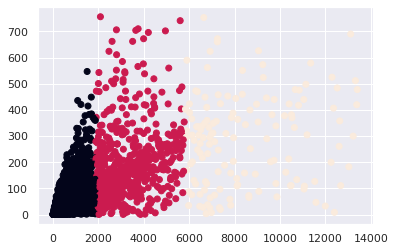

In [ ]:
plt.scatter(rfm['gasto'],rfm['frecuencia'],c=rfm.cluster)

Text(0.5, 0.92, 'Clientes Clusterizados')

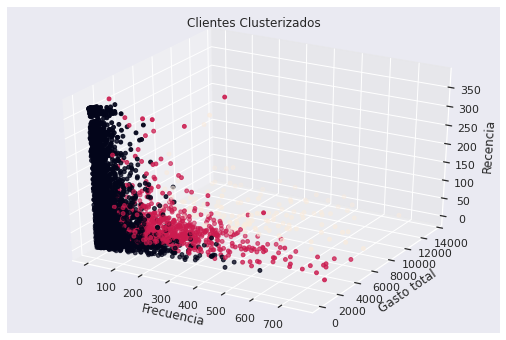

In [ ]:
fig=plt.figure(figsize=(30,6))
ax=fig.add_subplot(131,projection='3d')
ax.scatter(rfm['frecuencia'],rfm['gasto'],rfm['recencia'],c=rfm.cluster,s=15)
ax.set_xlabel('Frecuencia')
ax.set_ylabel('Gasto total')
ax.set_zlabel('Recencia')
ax.set_title('Clientes Clusterizados')

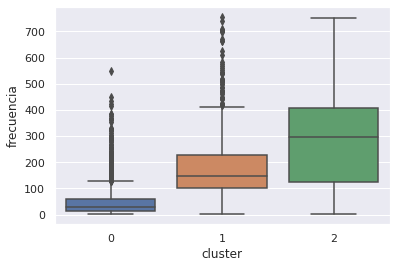

In [ ]:
sns.boxplot(x='cluster', y='frecuencia', data=rfm)

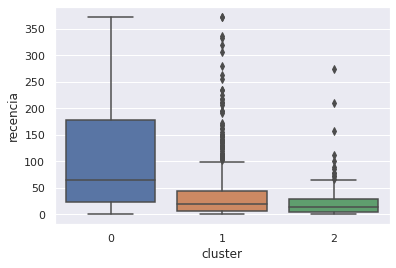

In [ ]:
sns.boxplot(x='cluster', y='recencia', data=rfm)

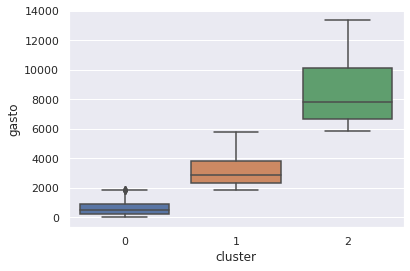

In [ ]:
sns.boxplot(x='cluster', y='gasto', data=rfm)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


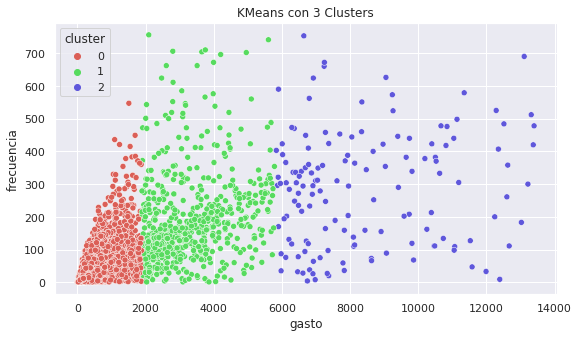

In [ ]:
plt.figure(figsize=(9, 5))
sns.scatterplot(rfm['gasto'], rfm['frecuencia'], hue=rfm['cluster'],
                palette=sns.color_palette('hls', 3))
plt.title('KMeans con 3 Clusters')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


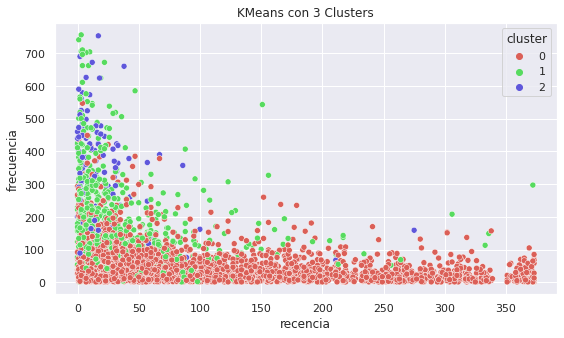

In [ ]:
plt.figure(figsize=(9, 5))
sns.scatterplot(rfm['recencia'], rfm['frecuencia'], hue=rfm['cluster'],
                palette=sns.color_palette('hls', 3))
plt.title('KMeans con 3 Clusters')
plt.show()

+ **Conclusiones**

Como resultado del análisis realizado se puede concluir que:

1.   Existe un horario de alta demanda entre las 12 PM y 15 PM, además, el día miércoles parece ser el que tiene más movimiento. Se espera que los servidores de la tienda cumplan con un buen rendimiento en este rango.
2.   Los países que más gastan son, luego del Reino Unido, son; Alemania, Francia e Irlanda. Los que más cantidades compran son; Países Bajos, Irlanda y Alemania. Por lo tanto, si la tienda busca expandir sus ventas en el extranjero, estos países deberían estar dentro de sus clientes objetivos.
3. Los atributos de los clientes graficados muestran que poseen una frecuencia de compra en promedio de 76 veces, un gasto total medio de $1312y una antigüedad cerca al año. Además, muchos clientes realizaron su última compra cerca de fin de año, periodo para el cual se deberían preparar en el próximo año entrante.
4. Hay correlaciones directas entre el gasto total y la frecuencia de compras y cantidades compradas.
5. Los productos preferidos por los compradores son ‘White hanging heart t-light holder’,‘Regency cakestand 3 tier’  y ‘Jumbo bag red retrospot’ por lo que siempre deberían estar provistos de estos.




